## DL Ann ###
Derin Öğrenme Yapay Sinir Ağı

## Kütüphaneleri Yükle ##

In [67]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [70]:
#Kütüphaneleri içe aktar ve versiyoınları kontrol et
import pandas as pd
print ('Pandas vs:', pd.__version__)

import numpy as np
print ('Numpy vs:', np.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

Pandas vs: 2.2.2
Numpy vs: 1.26.4


In [71]:
pip show matplotlib

Name: matplotlib
Version: 3.7.5
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /opt/conda/lib/python3.10/site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, beatrix_jupyterlab, Cartopy, catboost, cleverhans, contextily, descartes, explainable-ai-sdk, fastai, fitter, geoplot, ggplot, hypertools, imgaug, ipympl, ipyvolume, lime, matplotlib-venn, missingno, mlxtend, mne, mpld3, phik, plotnine, pointpats, prophet, PyUpSet, scikit-plot, seaborn, segregation, splot, stable-baselines3, vaex-viz, vtk, wfdb, wordcloud, ydata-profiling, yellowbrick
Note: you may need to restart the kernel to use updated packages.


## Veri Setini İçe Aktar ##

In [72]:
df=pd.read_csv('/kaggle/input/d/zaferturan/pima-indias-diabet/pima-indians-diabetes.csv')

## EDA ##

In [73]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: ylabel='count'>

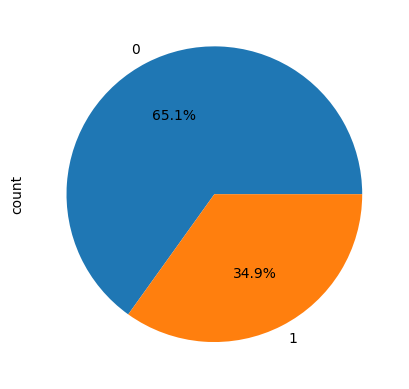

In [74]:
# pie plot
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

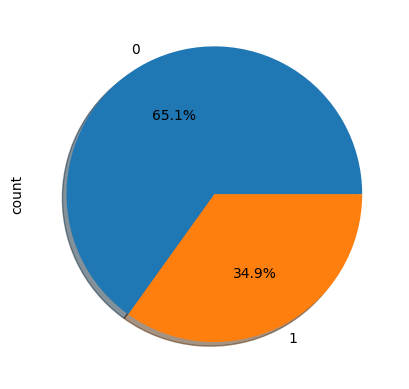

In [75]:
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
len(df[df['BMI']<5])


In [79]:
df_reg=df[df['BMI']>=5]

In [80]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               757 non-null    int64  
 1   Glucose                   757 non-null    int64  
 2   BloodPressure             757 non-null    int64  
 3   SkinThickness             757 non-null    int64  
 4   Insulin                   757 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  757 non-null    float64
 7   Age                       757 non-null    int64  
 8   Outcome                   757 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 59.1 KB


## Özellikleri ve Hedefi Seç ##

In [81]:
y=df_reg['Outcome']
X=df_reg.drop('Outcome',axis=1)

In [82]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [83]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 757, dtype: int64

## Standarlaştırma & Normalleştirme ##

In [84]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
#sc.fit(X)
#X=sc.transform(X)
X=sc.fit_transform(X)

## Modeli Oluştur ##

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [86]:
model=Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense (64,activation='relu'))
model.add(Dense (6, activation='relu'))
model.add(Dense (1,activation='sigmoid'))
model.compile (loss='binary_crossentropy', 
               optimizer='adam',
               metrics=['accuracy','Precision','Recall'],
              )

In [87]:
history=model.fit(X,y,
                 epochs=50,
                 batch_size=32,
                 validation_split=0.2,
                 verbose=1,
                 )

Epoch 1/50
19/19 [==============================] - 2s 19ms/step - loss: 0.6073 - accuracy: 0.6926 - precision: 0.5580 - recall: 0.5896 - val_loss: 0.5477 - val_accuracy: 0.7500 - val_precision: 0.7667 - val_recall: 0.4259
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.4924 - accuracy: 0.7686 - precision: 0.7093 - recall: 0.5755 - val_loss: 0.4952 - val_accuracy: 0.7697 - val_precision: 0.7568 - val_recall: 0.5185
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.4588 - accuracy: 0.7818 - precision: 0.7439 - recall: 0.5755 - val_loss: 0.4760 - val_accuracy: 0.7632 - val_precision: 0.7500 - val_recall: 0.5000
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.4516 - accuracy: 0.7835 - precision: 0.7314 - recall: 0.6038 - val_loss: 0.4706 - val_accuracy: 0.7632 - val_precision: 0.7143 - val_recall: 0.5556
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.4421 - accuracy: 0.7835 - precision: 

history = model.fit(X, y, ...): Bu satır, verilen eğitim verileri X ve hedef değişkenler y kullanılarak modelin eğitim sürecini başlatıyor. Eğitim işlemi sonunda, eğitim süreci hakkında ayrıntılı bilgileri içeren bir history objesi döndürülüyor.
epochs=50: Bu parametre, eğitim sürecinin toplam 50 adım (epoch) boyunca devam edeceğini belirtiyor. Yani model, eğitim verileriyle 50 kez işlem yapacak.
batch_size=32: Eğitim sırasında, modele 32 adet örnek (veri) verilecek ve ardından ağırlıklar güncellenecek. Batch boyutu, eğitim etkinliği ve bellek kullanımı açısından önemli bir parametredir.
validation_split=0.2: Bu parametre, eğitim verileri içinden %20'lik bir kısmının doğrulama (validation) verileri olarak ayrılacağını belirtiyor. Doğrulama verileri, modelin eğitim sırasındaki performansını ölçmek için kullanılır.
verbose=1: Bu parametre, eğitim süreci hakkında ayrıntılı bilgilerin konsola yazdırılacağını gösteriyor. verbose=0 olsaydı, eğitim sürecine dair güncellemeler gösterilmeyecekti.

''' iyi değil'''
#2 nd Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'Precision', 'Recall'])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
history = model.fit(X, y,
                   epochs=100,
                   batch_size=64,
                   validation_split=0.2,
                   callbacks=[
                       EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                       ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
                   ],
                   verbose=1)

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 120)               1080      
                                                                 
 dense_9 (Dense)             (None, 64)                7744      
                                                                 
 dense_10 (Dense)            (None, 6)                 390       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 9221 (36.02 KB)
Trainable params: 9221 (36.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


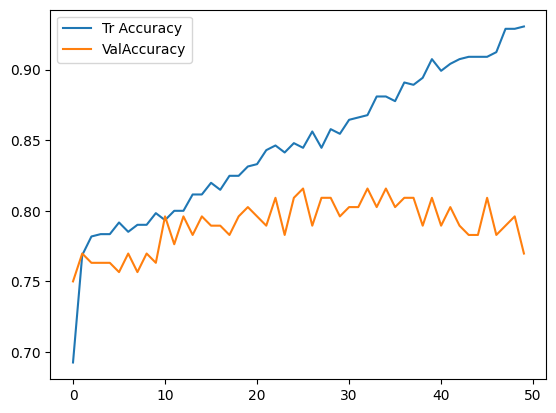

In [89]:
plt.plot(history.history['accuracy'], label='Tr Accuracy')
plt.plot(history.history['val_accuracy'], label='ValAccuracy')
plt.legend()

## Modeli Kaydet ##

In [90]:
model.save('diabetes.h5')

In [91]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## NB Deploy ## 

In [92]:
def predict_diabetes(input_data):
    input_data=np.asarray(input_data)
    input_data=input_data.reshape(1,-1)
    input_data=sc.transform(input_data)
    prediction=model.predict(input_data)
    print('Tahmin Olasılığı:', prediction[0])
    if prediction[0]>.5:
        return 1
    else: return 0

input_data.reshape(1,-1) kodu, input_data adlı bir veri kümesini yeniden şekillendirmektedir. Burada:

1: Yeni şeklin ilk boyutunun 1 olduğunu belirtir. Yani, tek bir örnek (satır) olacak.
-1: İkinci boyutun değerinin otomatik olarak hesaplanacağını belirtir. Bu, veri kümesinin orijinal boyutuna bağlı olarak belirlenecektir.
Sonuç olarak, bu kod satırı, input_data adlı veri kümesini tek örnek (satır) içeren bir tensöre (numpy dizisine) dönüştürmektedir. Bu, örneğin, tek bir örnek üzerinde tahmin yapmak istediğinizde kullanışlı olabilir. İşlem sonucunda, input_data artık tek bir satır ve orijinal sütun sayısına sahip bir tensör olacaktır.

* Değerleri girin hamilelik sayısı: 8
* Değerleri girin glikoz değeri: 183
* Değerleri girin kan basıncı: 64
* Değerleri girin deri kalınlığı: 0
* Değerleri girin insulin: 0
* Değerleri girin vücut kitle indeksi: 23.3
* Değerleri girin diyabet soy fonksiyonu: 0.672
* Değerleri girin yaş: 32

In [94]:
input_data=[]
columns=['Hamilelik sayısı', 'Glikoz değeri', 'Kan Basıncı',
        'Deri Kalınlığı', 'İnsulin', 'Vct Kitle İnd', "Diyabet Soy Fonks", 'Yaş']

for column in columns:
    value=float(input('Değerleri girin ' + column +": "))
    input_data.append(value)

    #Make Predictions
prediction = predict_diabetes(input_data)
print(prediction)

Değerleri girin Hamilelik sayısı:  8
Değerleri girin Glikoz değeri:  183
Değerleri girin Kan Basıncı:  64
Değerleri girin Deri Kalınlığı:  0
Değerleri girin İnsulin:  0
Değerleri girin Vct Kitle İnd:  23.3
Değerleri girin Diyabet Soy Fonks:  .672
Değerleri girin Yaş:  32


1/1 [==============================] - 0s 105ms/step
Tahmin Olasılığı: [0.9057133]
1


In [95]:
if prediction==1:
    print('Diyabet pozitif')
else:
    print('Diyabet negatif')

Diyabet pozitif
